# Linear Regression

Linear regressin model prediction:

$$\hat{y}= h_{\theta}(\mathbf{x})=\theta_{0}+\theta_{1}x_{1} + \theta_{2}x_{2} + \ldots + \theta_{n}x_{n} = \mathbf{ \theta} \cdot \mathbf{x}$$

MSE cost function for a linear Regression model:

$$MSE(\mathbf{X}, h_{\theta}) = \frac{1}{m} \sum_{i=1}^{m}(\mathbf{\theta}^{T}x^{(i)}-y^{(i)})^{2} $$

The normal equation:

$$\hat{\mathbf{\theta}} = (\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T}y$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

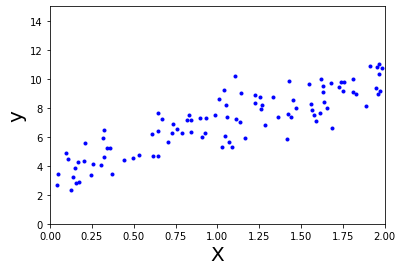

In [3]:
plt.plot(x,y, "b.")
plt.axis([0,2,0,15])
plt.xlabel("X", size = 20)
plt.ylabel("y", size = 20)
plt.show()

In [4]:
x_b = np.c_[np.ones((100,1)), x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[3.66788942],
       [3.20370592]])

In [5]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new]
y_pred = x_new_b.dot(theta_best)
y_pred

array([[ 3.66788942],
       [10.07530127]])

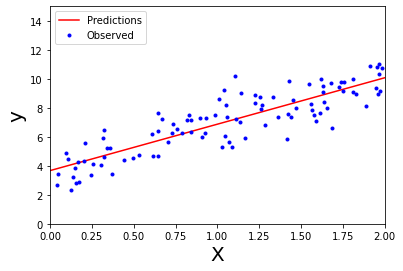

In [6]:
plt.plot(x_new, y_pred, "r-", label="Predictions")
plt.plot(x,y, "b.", label="Observed")
plt.axis([0,2,0,15])
plt.xlabel("X", size = "20")
plt.ylabel("y", size = "20")
plt.legend(loc="upper left")
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.66788942]), array([[3.20370592]]))

In [9]:
lin_reg.predict(x_new)

array([[ 3.66788942],
       [10.07530127]])

This function computes: $\hat{\mathbf{\theta}} = \mathbf{X}^{+}y$, where $\mathbf{X}^{+}$ is the *pseudoinverse* of $\mathbf{X}$ (the Moore-Penrose inverse).

The pseudoinverse is computed as $\mathbf{X}^{+} = \mathbf{V} \mathbf{\Sigma}^{+} \mathbf{U}^{T}$.

In [10]:
np.linalg.pinv(x_b).dot(y)

array([[3.66788942],
       [3.20370592]])

## Batch gradient descent

Partial derivatives of the cost function:

$$\frac{\partial}{\partial \theta_{j}} MSE(\mathbf{\theta}) = \frac{2}{m}\sum_{i=1}^{m}(\mathbf{\theta}^{T} \mathbf{x}^{i} - y^{i})x_{j}^{i}$$

Gradient vector of the cost function:

$$\nabla_{\mathbf{\theta}} MSE(\mathbf{\theta}) = \frac{2}{m}\mathbf{X}^{T} (\mathbf{X} \mathbf{\theta} - y) $$

Gradiend descent step:

$$\mathbf{\theta}^{(next \hspace{0.1cm} step)} = \mathbf{\theta} - \eta \nabla_{\theta} MSE(\theta) $$

In [11]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [12]:
theta = np.random.randn(2,1) # random initialization

In [13]:
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta*gradients

In [14]:
theta

array([[3.66788942],
       [3.20370592]])

## Stochastic gradient descent

In [15]:
n_epochs = 50
t_0, t_1 = 5, 50 # learning schedule hyperparameters

In [16]:
def learning_schedule(t):
    return t_0/(t + t_1)

In [17]:
theta = np.random.randn(2,1) # random initialization

In [18]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients

In [19]:
theta

array([[3.65794636],
       [3.24171198]])

In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.63712955]), array([3.21406722]))

## Polynomial Regression

In [23]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5  * x**2 + x + 2 + np.random.randn(m,1)

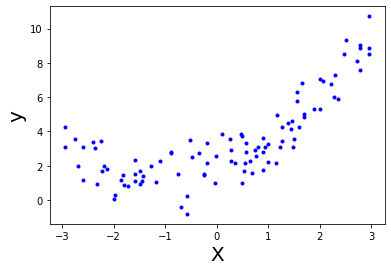

In [24]:
plt.plot(x, y, "b.")
plt.xlabel("X", size=20)
plt.ylabel("y", size="20")
plt.show()

In [25]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
x[0]

array([-0.74240461])

In [27]:
x_poly[0]

array([-0.74240461,  0.55116461])

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.90148292]), array([[1.05090688, 0.49722985]]))

In [29]:
theta = np.array([lin_reg.intercept_[0], lin_reg.coef_[0][0], lin_reg.coef_[0][1]])
X = np.c_[np.ones((100,1)), x_poly]
y_pred = X.dot(theta)

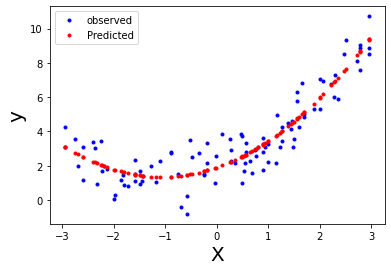

In [30]:
plt.plot(x,y, "b.", label="observed")
plt.plot(x,y_pred, "r.", label="Predicted")
plt.xlabel("X", size=20)
plt.ylabel("y", size=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [32]:
def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size", size=15)
    plt.ylabel("RMSE", size=15)
    plt.legend(loc="upper right")
    plt.axis([0, 80, 0, 8])

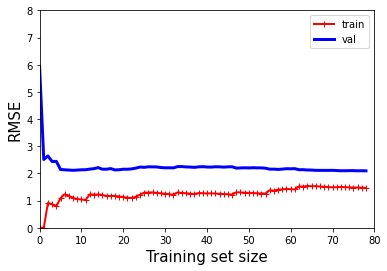

In [33]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x,y)

In [34]:
from sklearn.pipeline import Pipeline

In [35]:
Polynomial_Regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

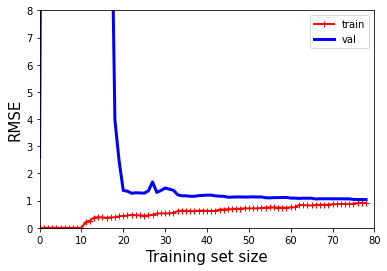

In [36]:
plot_learning_curves(Polynomial_Regression, x, y)

## Regularized Linear Models

A way to reduce overfitting is to regularization (i.e. to constraint the model).


### Ridge Regression

Ridge Regression cost function:

$$j(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{1}^{n} \theta_{i}^{2}$$

Ridge Regression closed-form solution:

$$\hat{\mathbf{\theta}} = (\mathbf{X}^{T} \mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^{T} \mathbf{y}$$

In [37]:
from sklearn.linear_model import Ridge

In [38]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg = ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[4.87473143]])

In [39]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([4.84736963])

### Lasso Regression

Lasso Regression cost function:

$$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} \vert \theta_{i} \vert$$

Lasso Regression subgradient:

$$g(\mathbf{\theta}, J) = \nabla_{\mathbf{\theta}} MSE(\mathbf{\theta)} + \alpha \begin{pmatrix}
sign(\theta_{1})\\ 
sign(\theta_{2})\\ 
\vdots  \\ 
sign(\theta_{n})
\end{pmatrix} \hspace{0.5cm} \text{where} \hspace{0.2cm} sign(\theta_{i}) = \begin{cases}
-1 & \text{ if } \theta_{i} < 0 \\ 
0 & \text{ if } \theta_{i} = 0 \\ 
1 & \text{ if } \theta_{i} > 0 
\end{cases}$$

In [40]:
from sklearn.linear_model import Lasso

In [41]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([4.83082128])

### Elastic Net

Elastic Net cost function:

$$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + r \alpha \sum_{i=1}^{n} \vert \theta_{i} \vert + \frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_{i}^{2}$$

In [42]:
from sklearn.linear_model import ElasticNet

In [43]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([4.8300035])

### Early Stopiing

In [44]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [45]:
# prepare the data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

In [46]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)

x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

In [47]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005)

In [48]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(x_train_poly_scaled, y_train); # continues where it left off
    y_val_predict = sgd_reg.predict(x_val_poly_scaled);
    val_error = mean_squared_error(y_val, y_val_predict);
    if val_error < minimum_val_error:
        minimum_val_error = val_error;
        best_epoch = epoch;
        best_model = clone(sgd_reg);
        
best_model

/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/valida

/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/valida

/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/juan/Data_Science/hands_on_ML/Chapter 4/training/lib/python3.8/site-packages/sklearn/utils/valida

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=-inf, warm_start=True)

# Logistic Regression

Losgistic Regression estimated probabilities:

$$\hat{p} = h_{\theta}(\mathbf{x}) = \sigma(\mathbf{x}^{T} \mathbf{\theta})$$

Sigmoid function:

$$\sigma(t) = \frac{1}{1 + exp(-t)}$$

Logistic Regression model prediction:

$$\hat{y} = \begin{cases}
0 & \text{ if } \hat{p}< 0.5 \\ 
1 & \text{ if } \hat{p} \geq 0.5 
\end{cases}$$

## Training and cost function

Logistic Regression cost function (log loss):

$$J(\mathbf{\theta}) = - \frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)} log(\hat{p}^{(i)}) + (1 - y^{(i)}) log(1 - \hat{p}^{(i)})\right]$$

Logistic cost function partial derivatives:

$$\frac{\partial}{\partial \theta_{j}} J(\mathbf{\theta}) = \frac{1}{m} \sum_{i=1}^{m}\left(\sigma(\mathbf{\theta}^{T} \mathbf{x}^{i}) - y^{i} \right)x_{j}^{i}$$

In [49]:
from sklearn import datasets

In [50]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [51]:
x = iris["data"][:, 3:] # petal width
y = (iris["target"]==2).astype(np.int) # 1 if iris virginica, else 0

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
log_reg = LogisticRegression()
log_reg.fit(x,y)

LogisticRegression()

Text(0, 0.5, 'Probability')

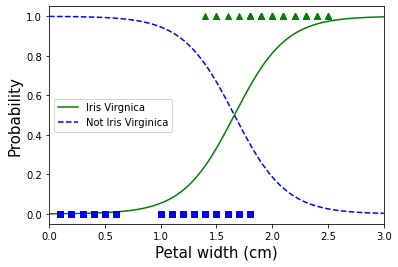

In [54]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
virginica = iris["data"][:,3:] [iris["target"]==2]
not_virginica = iris["data"][:,3:][y!=1]
plt.plot(x_new, y_proba[:,1], "g-", label="Iris Virgnica")
plt.plot(x_new, y_proba[:,0], "b--", label="Not Iris Virginica")
plt.plot(virginica, np.ones(virginica.shape[0]), "g^")
plt.plot(not_virginica, np.zeros(not_virginica.shape[0]), "bs")
plt.axis([0,3,-0.05,1.05])
plt.legend(loc="center left")
plt.xlabel("Petal width (cm)", size=15)
plt.ylabel("Probability", size=15)

# Softmax regression (multinomial Logistic Regression)

Softmax score for clas k:

$$s_{k}(\mathbf{x}) = \mathbf{x}^{T} \mathbf{\theta}^{(k)}$$

Softmax function:

$$\hat{p}_{k} = \sigma(\mathbf{s}(\mathbf{x}))_{k} = \frac{exp(s_{k}(\mathbf{x}))}{\sum_{j=1}^{K} exp(s_{j}(\mathbf{x}))}$$

- $K$ is the number of classes.
- $\mathbf{s(x)}$ is a vector containing the scores of each class for the instance $\mathbf{x}$.
- $\sigma(\mathbf{s(x)})_{k}$ is the estimated probability that the instance $\mathbf{x}$ belongs to class $k$, given the scores of each for that instance.

Softmax Regression classifier prediction:

$$\hat{y} = \underset{k}{\operatorname{argmax}} \sigma(\mathbf{s(x)})_{k} = \underset{k}{\operatorname{argmax}} s_{k}(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \left(\left(\mathbf{\theta}^{(k)}  \right)^{T} \mathbf{x} \right)$$

Cross entropy cost function

$$J(\mathbf{\Theta}) = - \frac{1}{m} \sum_{i = 1}^{m} \sum_{k = 1}^{K} y_{k}^{(i)} log(\hat{p}_{k}^{(i)})$$

- $y_{k}^{(i)}$ is the target probability that the $i^{\text{th}}$ instance belongs to class $k$.

Cross entropy gradient vector for class $k$:

$$\nabla_{\mathbf{\theta}^{(k)}} J(\mathbf{\Theta}) = \frac{1}{m} \sum_{i = 1}^{m} (\hat{p}_{k}^{(i)} - y_{k}^{(i)}) \mathbf{x}^{(i)}$$

In [55]:
x = iris["data"][:, (2,3)] # petal length, petal width
y = iris["target"]

In [56]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(x,y)

LogisticRegression(C=10, multi_class='multinomial')

In [57]:
softmax_reg.predict([[5,2]])

array([2])

In [58]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])